Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [22]:
mpg_city_median = mpg |>
    group_by(class) |>
    summarize(cty = median(cty)) |>
    arrange(desc(cty))

mpg_city_median %>% head()

class,cty
<chr>,<dbl>
compact,20
subcompact,19
midsize,18
minivan,16
2seater,15
pickup,13


reorder lets your reorder one categorical column based on some operation that is performed on a numerical column

for each value in class, the median of all city values are taken:

In [23]:
mpg2 = mpg |>
    mutate(class = fct_reorder(class, cty, median))

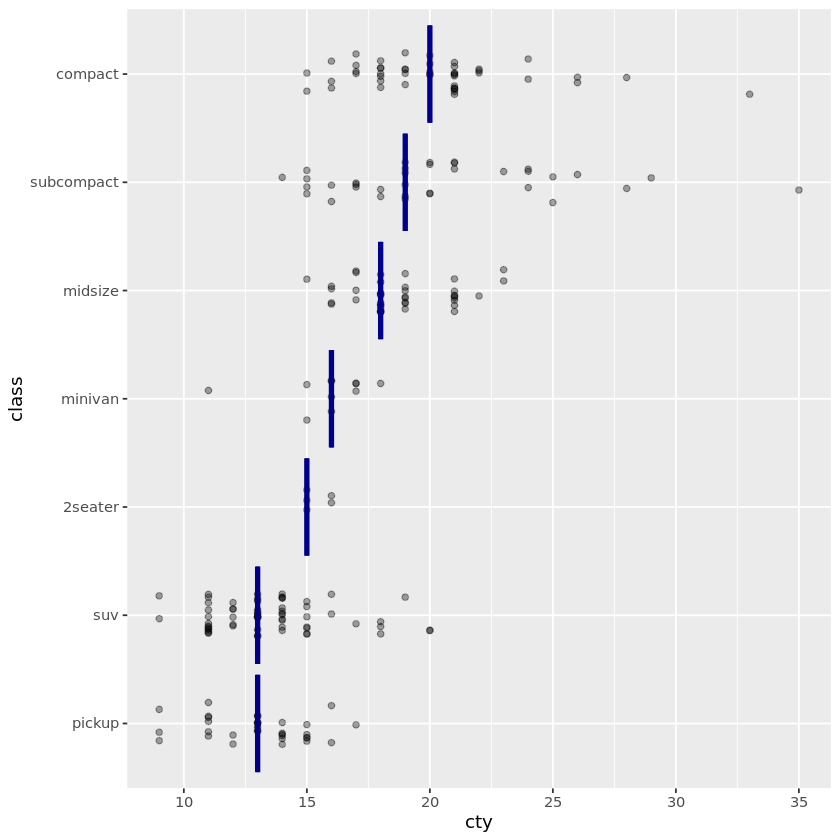

In [28]:
p = ggplot(mpg2, aes(x = cty, y = class)) +
    geom_point(alpha=0.35, position = position_jitter(height=0.2, width = 0)) +
    geom_crossbar(data = mpg_city_median, aes(xmax = cty, xmin = cty), color = "darkblue", fatten = 1.5, linewidth = 1)
p